**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Aprendizaje Automático - Modelos de Regresión

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import requests
import io
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
#import dmba as dm

from scipy.optimize import minimize # Librería que se utiliza para resolver el modelo de optimización. En este caso, se utiliza
                                    # la clase minimize para resolver el problema por minimización.
import random # para generar datos aleatorios de forma uniforme

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score # Método de validación cruzada para evaluar el desempeño un modelo
from sklearn.metrics import explained_variance_score # Se llama a una clase llamada explained_variance_score, el cual es
                                                     # una métrica de varianza explicada
from sklearn.metrics import mean_absolute_error # Se llama a una clase llamada mean_absolute_error, el cual es
                                                # una métrica de error promedio absoluto
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance # 0.001 (Sensibilidad del modelo regresión)

from sklearn.linear_model import LinearRegression # Algoritmo para crear el modelo de regresión lineal múltiple
from sklearn.preprocessing import PolynomialFeatures # Características Polinomiales
from sklearn.linear_model import RANSACRegressor # Se llama a una clase llamada RANSACRegressor para aplicar el método 
                                                 # RANSAC o random sample consensus

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Electrical.csv"
download = requests.get(url).content
data = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=',',
                     decimal = ',')
# Es importante codificarlo a utf-8
display(data.head(20))

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.95906002455997,3.07988520422811,8.38102539191882,9.78075443222607,3.76308477206316,-0.782603630987543,-1.25739482958732,-1.7230863114883,0.650456460887227,0.859578105752345,0.887444920638513,0.958033987602737,0.0553474891727752,unstable
1,9.3040972346785,4.90252411201167,3.04754072762177,1.36935735529605,5.06781210427845,-1.94005842705193,-1.87274168559721,-1.25501199162931,0.41344056837935,0.862414076352903,0.562139050527675,0.781759910653126,-0.00595746432603695,stable
2,8.97170690932022,8.84842842134833,3.04647874898866,1.21451813833956,3.40515818001095,-1.20745559234302,-1.27721014673295,-0.92049244093498,0.163041039311334,0.766688656526962,0.839444015400588,0.109853244952427,0.00347087904838871,unstable
3,0.716414776295121,7.66959964406565,4.48664083058949,2.34056298396795,3.96379106326633,-1.02747330413905,-1.9389441526466,-0.997373606480681,0.446208906537321,0.976744082924302,0.929380522872661,0.36271777426931,0.028870543444887,unstable
4,3.13411155161342,7.60877161603408,4.94375930178099,9.85757326996638,3.52581081652096,-1.12553095451115,-1.84597485447561,-0.554305007534195,0.797109525792467,0.455449947148291,0.656946658473716,0.820923486481631,0.0498603734837059,unstable
5,6.99920870915215,9.10924671643764,3.7840659093988,4.26778760341917,4.42966882280625,-1.85713917685067,-0.670396827477973,-1.90213281847761,0.261792854117035,0.0779296721686504,0.542883858522323,0.469931041283024,-0.0173849069339299,stable
6,6.71016636762265,3.76520418352323,6.92931443867021,8.81856192345691,2.39741922937942,-0.614589561907959,-1.20882589139371,-0.574003776077751,0.177889561089242,0.397976580119618,0.402045952122677,0.376630279179848,0.0059535705684696,unstable
7,6.95351155782518,1.37912500228657,5.71940003020014,7.87030742603241,3.22449515790325,-0.748997751247627,-1.1865169283662,-1.28898047828942,0.371384852592056,0.633203555433068,0.732740894287254,0.380544478575059,0.0166342974538163,unstable
8,4.68985192749584,4.00774746209312,1.47857287590383,3.73378749230253,4.04129961368168,-1.41034431234687,-1.23820427574315,-1.39275102559166,0.269708270661235,0.250364217202032,0.164941118523114,0.482439411001001,-0.0386765836142913,stable
9,9.84149648830214,1.41382159178999,9.76985554870019,7.64161626330592,4.72759504201898,-1.99136336778711,-0.857637206946418,-1.87859446728545,0.376355980566834,0.544415315810004,0.792039424640656,0.116262822352385,0.0123834141734175,unstable


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tau1    10000 non-null  object
 1   tau2    10000 non-null  object
 2   tau3    10000 non-null  object
 3   tau4    10000 non-null  object
 4   p1      10000 non-null  object
 5   p2      10000 non-null  object
 6   p3      10000 non-null  object
 7   p4      10000 non-null  object
 8   g1      10000 non-null  object
 9   g2      10000 non-null  object
 10  g3      10000 non-null  object
 11  g4      10000 non-null  object
 12  stab    10000 non-null  object
 13  stabf   10000 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [4]:
data = data.iloc[:,:13].astype(float)
display(data)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789


In [5]:
X = data[['tau1',	'tau2',	'tau3',	'tau4',	'p1',	'p2',	'p3',	'p4',	'g1',	'g2',	'g3',	'g4']] # Caracteriísticas
Y = data['stab'] # Salida

In [6]:
X.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


In [7]:
MM = MinMaxScaler()
X_Norm = MM.fit_transform(X)

In [8]:
X_Norm_Train, X_Norm_Test, Y_Train, Y_Test = train_test_split(X_Norm, Y, test_size = 0.25, train_size = 0.75, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", X_Norm_Train.shape)
print("Tamaño de los Datos de Validación = ", X_Norm_Test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", Y_Train.shape)
print("Tamaño del Vector de Clases de Prueba = ", Y_Test.shape)

Tamaño de los Datos de Entrenamiento =  (7500, 12)
Tamaño de los Datos de Validación =  (2500, 12)
Tamaño del Vector de Clases de Entrenamiento =  (7500,)
Tamaño del Vector de Clases de Prueba =  (2500,)


## Concepto de Regresión

Por definición, un **modelo de regresión** son predictores y son idoneos para el sistema que genere respuestas continuas. El objetivo de un modelo de regresión es encontrar aquellos valores de los parámetros que permite minimizar el error de estimación del modelo. De esta manera, la regresión busca encontrar aquellos coeficientes de una función que mejor se ajusten a un conjunto de datos. Al encontrar el mejor modelo de regresión para un conjunto de datos de entrenamiento, se puede hacer predicciones con los datos de prueba.

La función matemática que describe un modelo de regresión de un sistema con respuestas continuas es:

$$Y = aX$$

donde $Y$ es la salida del sistema (la predicción), $X$ es la entrada del sistema y $a$ es un parámetro (coeficientes).

## Regresión Lineal

### Concepto General del Modelo de Regresión Lineal

Considere un conjunto de datos de vectores de valores reales, dado por:

$$\mathbf{X} = \begin{bmatrix} x_{1,1} & \ldots & x_{1,d} & \ldots  & x_{1,D}\\
\vdots & \ldots & \ddots & \ldots & \vdots \\
x_{n,1} & \ldots & x_{n,d} & \ldots & x_{n,D} \\
\vdots & \ldots & \ddots & \ldots & \vdots \\
x_{N,1} & \ldots & x_{N,d} & \ldots & x_{N,D} \end{bmatrix}$$

donde $x_{n,d}$ es un elemento entre una muestra $n$ y un descriptor o característica $d$; $N$ es el número de muestras de los datos de entrenamiento; $D$ es el número de características de los datos de entrenamiento. Cada $x_{n,d}$ es un valor real.

Cada vector de entrada es asociado con un valor real $y$, dado por:

$$\mathbf{Y} = \lbrace y_1, \ldots, y_n, \ldots, y_N \rbrace$$

Considerando $\mathbf{X}$ e $\mathbf{Y}$, se define un modelo lineal que permite aproximar los valores de salida a través de un proceso de regresión. La idea es aproximar la salida generada por el modelo lineal con la salida original de los datos para obtener un modelo óptimo que nos permita hacer predicción con otros datos de comportamiento similar al original. En este caso, la salida del modelo de regresión lineal esta dado por:

$$\hat{y} = a_0 + \sum^{m}_{i = 1} a_{i} x_{i}$$

donde $a_0, \ldots, a_{i}, \ldots, a_{m}$ son los coeficientes que permiten ajustar el modelo.

Para el caso de un modelo de regresión bidimensional o de dos dimensiones, consideramos por ejemplo:

$$\hat{y} = a_0 + a_1*x$$

Para obtener los valores de $a_0$ y $a_1$, el modelo lineal resuelve un **problema de optimización**, en el cual debe minimizar la siguiente función:

$$\min \frac{1}{2} \sum_{n = 1}^N (\hat{y}_{n} - y_{n})^2 = \min \frac{1}{2} \sum_{n = 1}^N (\lbrack a_0 + a_1*x_{n} \rbrack - y_{n})^2$$

Por consiguiente, el modelo de optimización establece una diferencia entre $\hat{y}_{n} - y_{n}$, el cual permite reducir el **error de regresión**. Cuando establecemos que $(\hat{y}_{n} - y_{n})^2$, se eleva al cuadrado porque el error de regresión se determina por una **métrica Euclidiana o distancia Euclidiana** entre dos puntos. 

Para resolver el problema de optimización, se debe encontrar el mínimo global de todos los datos usando el método del gradiente descendiente (con derivadas parciales), como se indica a continuación:

$$L = \frac{1}{2} \sum_{n = 1}^N (\lbrack a_0 + a_1*x_{n} \rbrack - y_{n})^2$$

$$\frac{\partial  L}{\partial a_{0}} = \sum_{n = 1}^N (\lbrack a_0 + a_1*x_{n} \rbrack - y_{n}) = 0$$

$$\frac{\partial  L}{\partial a_{1}} = \sum_{n = 1}^N (\lbrack a_0 + a_1*x_{n} \rbrack - y_{n})*x_{i} = 0$$

Basado en la explicación de la regresión lineal, vamos a mostrar un ejemplo de regresión lineal bidimensional.

In [ ]:
x = np.linspace(-10, 10, 2000).T # Se crea un rango de valores de x entre -10 y 10, generando 2000 muestras
ruido = 0.8
y = (x + 2) + ruido # Definimos y = x + 2. Se multiplica con un nivel de ruido para ver el desempeño del modelo.
muestras = 2000 # Número de muestras

Se define la función:

$$L = \frac{1}{2} \sum_{n = 1}^N (\lbrack a_0 + a_1*x_{n} \rbrack - y_{n})^2$$

In [ ]:
def funcion(a):
    L = 0
    for i in range(muestras):
        L += 0.5*(np.square(a[0] + a[1]*x[i] - y[i]))
    return L

Se define el método de gradiente descendiente, a partir de:

$$\frac{\partial  L}{\partial a_{0}} = \sum_{n = 1}^N (\lbrack a_0 + a_1*x_{n} \rbrack - y_{n})$$

$$\frac{\partial  L}{\partial a_{1}} = \sum_{n = 1}^N (\lbrack a_0 + a_1*x_{n} \rbrack - y_{n})*x_{i}$$

In [ ]:
def gradiente_descendiente(a):
    derivada_parcial = np.zeros(shape = 2)
    for i in range(muestras):
        derivada_parcial[0] += (a[0] + a[1]*x[i] - y[i])
        derivada_parcial[1] += ((a[0] + a[1]*x[i] - y[i])*x[i])
    return derivada_parcial

In [ ]:
# Se resuelve el modelo de optimización por minimización a partir de las anteriores funciones creadas

Resultado = minimize(fun = funcion, x0 =[0, 0], jac = gradiente_descendiente, method = 'L-BFGS-B')
# fun es donde se define la función objetivo del modelo de optimización
# x0 son las condiciones iniciales de los coeficientes del modelo
# jac es el método de solución propuesto por el usuario. En este caso, se utilizará el gradiente descendiente creado en la
# anterior celda.
# method es el tipo de método que se va a utilizar. En nuestro caso, se utilizará 'L-BFGS-B' donde es el algoritmo BFGS
# o el método cuasi-Newton de Broyden, Fletcher, Goldfarb y Shanno (muy recomendado para regresión lineal)
# Para mayor información de otros métodos:
# url: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [ ]:
a_nuevo = Resultado.x # Se extrae los coeficientes resultantes de las solución del modelo de optimización
y_predicho = a_nuevo[0] + a_nuevo[1]*x # Se construye la nueva función lineal

In [ ]:
plt.scatter(x, y, s = 30, edgecolor='k') # Generar gráfica entre x e y con color rojo
plt.plot(x, y_predicho, color = 'r') # Generar gráfica entre x e y con color magenta
plt.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
plt.xlim(-10, 10) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
plt.ylim(-10, 10) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
plt.title('Regresión lineal bidimensional') # Titulo de la gráfica
plt.xlabel('x') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

Error de regresión:

$$Error = \left ( \frac{1}{N} \sum_{n = 1}^N (\hat{y} - y)^2 \right ) *100\%$$

In [ ]:
Error_Regresión = (1/muestras)*np.square((y - y_predicho)).sum()
print(Error_Regresión*100)

### Construyendo el Modelo de Regresión Lineal

In [ ]:
LR = LinearRegression()
LR.fit(X_Norm_Train, Y_Train)

LinearRegression()

Una vez construido el modelo, se procede a analizar la **Importancia de las características**, el cual es un método para asignar puntuaciones a las características de entrada de un modelo (regresión o clasificación) que indica la importancia relativa de cada una al hacer una predicción. Usualmente, la importancia de las características garantiza un mejor entendimiento de los datos y del modelo, así como reducir el número de características, teniendo en cuenta que el método calcula la entropía en cada característica. En varios modelos de machine learning, la importancia de las características son representados mediante **coeficientes**, que son ponderaciones de las características (suma de pesos de los datos de cada característica). 

Veamos como se obtiene la importancia de las características usando un modelo de regresión lineal múltiple:

In [ ]:
Caracteristicas = ['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4']

importancia = LR.coef_ # Importancia de las características

importancia = pd.DataFrame(importancia, index = Caracteristicas, columns = ['Puntaje'])
importancia_ordenada = importancia.sort_values(by = ['Puntaje'])
display(importancia_ordenada)

,Puntaje
p1,-2.962016e+11
p4,-1.037578e+11
p3,-1.037558e+11
p2,-1.037496e+11
tau1,3.435844e-02
tau4,3.550330e-02
tau2,3.551695e-02
g2,3.571679e-02
tau3,3.582239e-02
g4,3.585896e-02


Los coeficientes positivos indican que predicen una tendencia creciente y los coeficientes negativos indican que predicen una tendencia decreciente de la variable de salida del modelo.

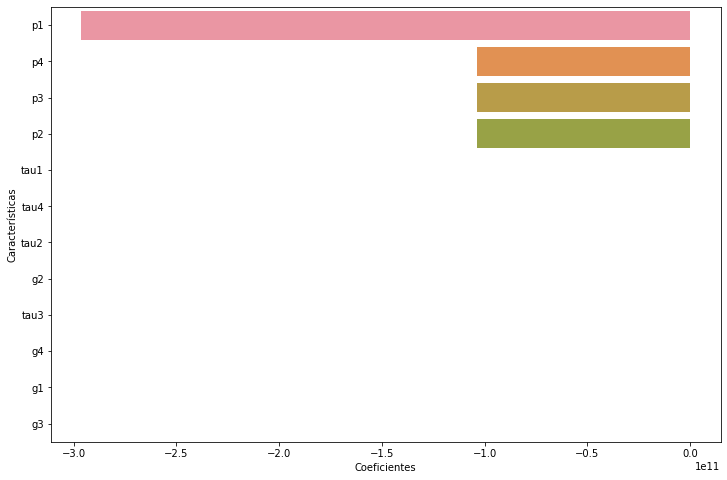

In [ ]:
imp = importancia_ordenada.values
imp = np.squeeze(np.asarray(imp))

#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig = plt.figure(figsize=(12,8))

sns.barplot(y = importancia_ordenada.index, x = imp.T)
plt.xlabel("Coeficientes")
plt.ylabel("Características")
plt.show()

Ahora vamos a utilizar los datos de prueba para hacer una comparación entre los valores estimados por el modelo y los valores conocidos de prueba.

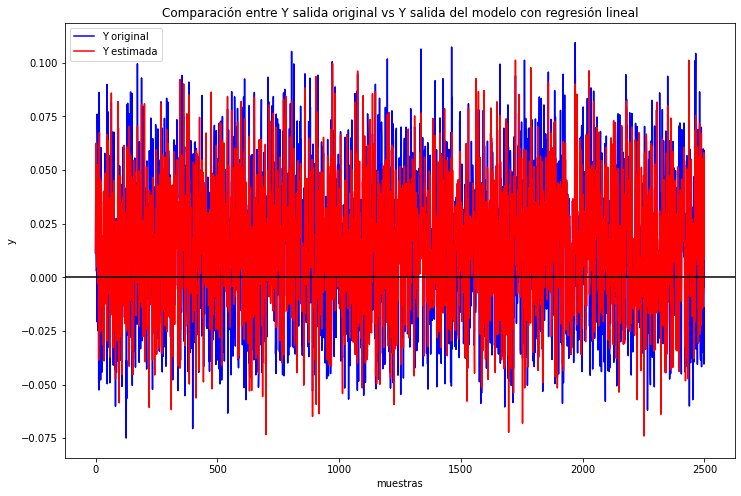

In [ ]:
Y_pred = LR.predict(X_Norm_Test) # Estima los valores de salida del modelo de regresión

fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_pred, color = 'r', label='Y estimada') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

### Validación de un Modelo de Regresión Lineal

#### Puntaje y error cuadrático medio negativo por validación cruzada

In [ ]:
Puntaje_1 = LR.score(X_Norm_Test, Y_Test) # Validación por puntaje o score
Validacion = cross_val_score(LR, X_Norm_Test, Y_Test, cv = 5, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.6385
Media = -0.0005
Desviación Estándar = 0.000032720312212


#### Coeficiente $R^2$

**Coeficiente de determinación o $R^2$**: Mide la cantidad de varianza de la predicción el cual es explicado por el conjunto de datos:

$$R^2 = 1 - \frac{\sum_{n} r^2_n}{\sum_n (x_n - E\lbrack X\rbrack)^2}$$

donde $r_n$ es el residuo dado por $r_n = x_n - \hat{x}_n$, donde $x$ es un vector de características de los datos originales y $\hat{x}$ es un vector de características de los datos predichos, y $E\lbrack X\rbrack$ es la esperanza de $X$ o del conjunto de datos donde se establece por el promedio o media.

Si $R^2$ es cercano a 1, significa que el modelo es perfecto para la hacer tareas de predicción.

*NOTA*: Está métrica solamente se utiliza para modelos de regresión lineal. Si se construye un modelo de regresión No lineal, se genera un sesgo muy amplio que no permite estimar apropiadamente la varianza generada por el modelo

In [ ]:
Validacion_R2 = cross_val_score(LR, X_Norm_Test, Y_Test, cv = 5, scoring = 'r2')
Puntaje_3 = np.array([Validacion_R2.mean(), Validacion_R2.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada con coeficiente de determinación
print("Media o R2 promedio = {:.4f}".format(Puntaje_3[0]))
print("Desviación Estándar de R2 = {:.4f}".format(Puntaje_3[1]))

Media o R2 promedio = 0.6376
Desviación Estándar de R2 = 0.0198


#### Varianza Explicada

**Varianza Explicada:** Mide la varianza entre la salida predicha y la salida de los datos originales, a través del cuadrado de las desviaciones estándar:

$$VarianzaExplicada = 1 - \frac{Var(y - \hat{y})}{Var(y)}$$

donde $y$ es la salida con los datos originales y $\hat{y}$ es la salida predicha por el modelo.

Si la varianza explicada es cercano a 1, el modelo es perfecto.

In [ ]:
Puntaje_4 = explained_variance_score(Y_Test, Y_pred) # Se calcula la varianza Explicada
print("Varianza Explicada = {:.4f}".format(Puntaje_4))

Varianza Explicada = 0.6387


#### Error promedio absoluto

**Error promedio absoluto:** Es una métrica que calcula el error promedio absoluto, correspondiente al valor esperado de la pérdida del error absoluto entre la salida predicha y la salida de los datos originales:

$$MAE = \frac{1}{M} \sum_{m = 1}^{M - 1} \vert y_{m} - \hat{y}_{m} \vert$$

donde $M$ es el número de muestras de los datos de prueba y $m$ es la m-ésima muestra de los datos de prueba

In [ ]:
Puntaje_5 = mean_absolute_error(Y_Test, Y_pred) # Se calcula el error promedio absoluto
print("MAE = {:.4f}".format(Puntaje_5))

MAE = 0.0176


#### Pérdida media de regresión de la desviación de Poisson

Es una métrica que se calcula como:

$$MAE_{Poisson} = \frac{2}{M} \sum_{m=1}^{M-1} \left ( y_m log\left \lbrack \frac{y_m}{\hat{y}_{m}} \right \rbrack + \hat{y}_{m} - y_m  \right )$$

donde $M$ es el número de muestras de los datos de prueba y $m$ es la m-ésima muestra de los datos de prueba.

**OJO:** Solamente se puede utilizar esta métrica si $y_m$ y $\hat{y}_{m}$ son valores **positivos**. En caso que ambas variables tengan valores negativos, sugiero normalizar los valores entre 0 (se recomienda 0.0001) y 1.

In [ ]:
MN = MinMaxScaler(feature_range=(0, 1))
Y_Test_R = Y_Test.values
Y_Test_R = np.asarray(Y_Test_R)

Y_merge = np.vstack([Y_Test_R,Y_pred]).T # unificamos Y_prueba así como y_pred y luego aplicamos una transpuesta a la matriz

Y_merge = MN.fit_transform(Y_merge)

for _,n in enumerate(np.arange(0, Y_merge.shape[0])):
  if Y_merge[n,0] == 0:
    Y_merge[n,0] = 0.0001
  elif Y_merge[n,1] == 0:
    Y_merge[n,1] = 0.0001

In [ ]:
Puntaje_6 = mean_poisson_deviance(Y_merge[:,0], Y_merge[:,1]) # Se calcula la Pérdida media de regresión de la desviación de Poisson
print("MAE_Poisson = {:.4f}".format(Puntaje_6)) # Si la pérdida es 0, significa que el modelo es eficiente

MAE_Poisson = 0.0353


#### Pérdida media de regresión de la desviación Gamma

Es una métrica que se calcula como:

$$MAE_{Gamma} = \frac{2}{M} \sum_{m=1}^{M-1} \left ( log\left \lbrack \frac{\hat{y}_{m}}{y_{m}} \right \rbrack + \frac{y_m}{\hat{y}_{m}} - 1  \right )$$

donde $M$ es el número de muestras de los datos de prueba y $m$ es la m-ésima muestra de los datos de prueba

In [ ]:
Puntaje_7 = mean_gamma_deviance(Y_merge[:,0], Y_merge[:,1]) # Se calcula la Pérdida media de regresión de la desviación Gamma
print("MAE_Gamma = {:.4f}".format(Puntaje_7)) # Si la pérdida es 0, significa que el modelo es eficiente pero es muy sensible
                                              # a errores relativos. Se recomienda analizarlo con mayor detalle.  

MAE_Gamma = 1.4784


#### Validación por OLS (Mínimos cuadrados ordinarios)

OLS o mínimos cuadrados ordinarios es un modelo generalizado de una variable, lo cual estima un conjunto de parámetros desconocidos de un modelo de regresión lineal. Este modelo generalizado selecciona los parámetros de una regresión lineal por un principio de mínimos cuadrados, es decir, minimiza la suma de los cuadrados de la diferencia entre la variable objetivo u observado de un conjunto de datos y la variable predicha por el modelo lineal.

In [ ]:
!pip install dmba # Data Mining for Business Analytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import dmba as dm

no display found. Using non-interactive Agg backend


In [ ]:
X_Norm_Test = pd.DataFrame(X_Norm_Test, columns = X.columns)

In [ ]:
model = sm.OLS(Y_Test_R, X_Norm_Test.assign(const = 1)) 
# const = 1 añade una columna con el valor constante 1 para modelar la intersección entre Y_Test y Y_Pred
Resultados = model.fit()
Resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     402.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:34:06   Log-Likelihood:                 5999.7
No. Observations:                2500   AIC:                        -1.198e+04
Df Residuals:                    2488   BIC:                        -1.191e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tau1           0.0347      0.002     22.649      0.000       0.032       0.038
tau2           0.0352      0.002     23.221      0.000       0.032       0.038
tau3           0.0338      0.002     21.998      0.000       0.031       0.037
tau4           0.0369      0.002     23.829      0.000       0.034       0.040
p1            -0.0545      0.001    -41.327      0.000      -0.057      -0.052
p2            -0.0193      0.001    -13.833      0.000      -0.022      -0.017
p3            -0.0177      0.001    -12.463      0.000      -0.021      -0.015
p4            -0.0208      0.001    -14.817      0.000      -0.024      -0.018
g1             0.0343      0.002     22.417      0.000       0.031       0.037
g2             0.0397      0.002     25.967      0.000       0.037       0.043
g3             0.0381      0.002     24.845      0.000       0.035       0.041
g4             0.0373      0.002     24.407      0.000       0.034       0.040
const         -0.0725      0.001    -55.931      0.000      -0.075      -0.070
==============================================================================
Omnibus:                       48.460   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.860
Skew:                          -0.348   Prob(JB):                     9.03e-12
Kurtosis:                       3.067   Cond. No.                     5.13e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.83e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

NOTA: La multicolinealidad se presenta cuando las características que permiten crear el modelo de regresión tienen una correlación perfecta o más o menos perfecta, lo cual la regresión puede ser inestable.

AIC es el criterio de información de Akaike el cual penaliza la adición de términos de un modelo_

$$AIC = 2D + Nlog\left(\frac{RSS}{N} \right)$$

donde $D$ es el número de variables, $N$ es el número de muestras y $RSS$ es el máximo valor de una función de verosimilitud de un modelo.
Entre más pequeño es el valor de AIC, el modelo se ajusta perfectamente a los datos de salida conocidos.

BIC es el criterio de información Bayesiano, el cual es una penalización más estricta con respecto a AIC. 

In [ ]:
Resultados.tvalues # Aplicamos la prueba t

tau1     22.649182
tau2     23.220928
tau3     21.997614
tau4     23.828889
p1      -41.327185
p2      -13.833128
p3      -12.463305
p4      -14.816813
g1       22.416701
g2       25.967251
g3       24.845191
g4       24.407467
const   -55.931144
dtype: float64

Si el valor t es alto con valores p próximos a 0, significa que la característica se puede considerar como candidata para ser usado en la predicción con nuevos datos. Por otra parte, si el valor t es bajo, el la característica NO se puede considerar como candidata para ser usado en las tareas de predicción.

#### Análisis por Valores Atípicos

In [ ]:
Modelo_para_outlier = sm.OLS(Y_Test_R, X_Norm_Test.assign(const = 1))
Modelo_Outlier = Modelo_para_outlier.fit()
influencia_outliers = OLSInfluence(Modelo_Outlier)
Residuos = influencia_outliers.resid_studentized_internal

In [ ]:
Residuos

0      -0.004943
1       0.146322
2      -0.177077
3      -0.252463
4      -0.729865
          ...   
2495    0.729237
2496    0.102957
2497    0.007312
2498   -2.192021
2499   -2.262565
Length: 2500, dtype: float64

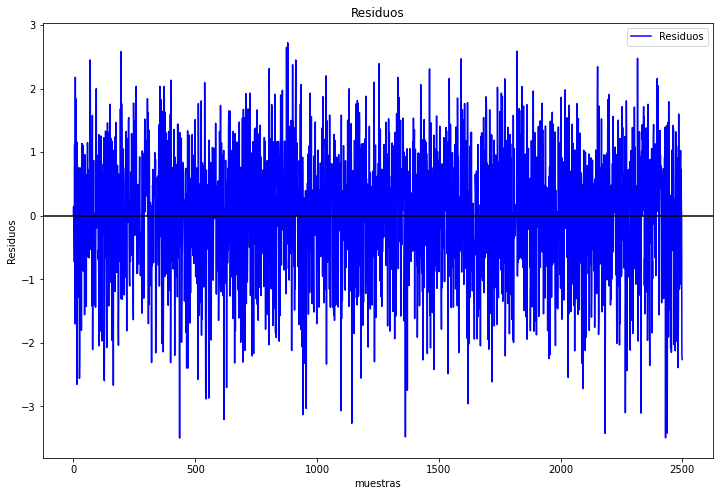

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot(np.arange(len(Residuos)), Residuos, color = 'b', label='Residuos') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Residuos') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('Residuos') # Etiqueta del eje y
plt.show() # Mostrar gráfica

In [ ]:
print(f'Mínimo residuo: {Residuos.min()}')

Mínimo residuo: -3.4973028951985063


In [ ]:
A = X_Norm_Test.values
B = Y_Test_R
Data_merge = np.vstack((A.T,B.T))
Data_merge = Data_merge.T
Data_merge = pd.DataFrame(Data_merge, columns = data.columns)
display(Data_merge)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,0.667060,0.964887,0.729146,0.470556,0.415566,0.949384,0.783016,0.026333,0.116676,0.313613,0.570263,0.058984,0.011463
1,0.439245,0.999837,0.757892,0.600671,0.477002,0.637958,0.867222,0.078145,0.325862,0.473908,0.051437,0.975966,0.041958
2,0.268320,0.482178,0.899223,0.870810,0.555988,0.580949,0.064688,0.712186,0.831424,0.467346,0.594683,0.886687,0.057673
3,0.383778,0.732173,0.363710,0.964120,0.366558,0.136736,0.887536,0.874304,0.965634,0.275925,0.242204,0.152646,0.011312
4,0.774237,0.020922,0.786406,0.507828,0.594421,0.424777,0.782603,0.040727,0.235614,0.565319,0.441032,0.708777,0.002803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.811483,0.125055,0.939637,0.679022,0.405111,0.069301,0.997882,0.721331,0.821813,0.176483,0.883698,0.383917,0.059890
2496,0.470416,0.809997,0.361728,0.452867,0.356126,0.400121,0.698213,0.830039,0.112650,0.429242,0.616299,0.105250,-0.004950
2497,0.892217,0.702848,0.872500,0.373835,0.359641,0.932194,0.541026,0.445156,0.300646,0.706807,0.507195,0.843847,0.059338
2498,0.219717,0.982910,0.308932,0.145170,0.739055,0.154824,0.328616,0.351743,0.513180,0.285200,0.808097,0.505955,-0.040443


In [ ]:
outliers = Data_merge.loc[Residuos.idxmin(), :]
display(outliers)

tau1    0.973704
tau2    0.136877
tau3    0.054236
tau4    0.796413
p1      0.408330
p2      0.742225
p3      0.408644
p4      0.628496
g1      0.644606
g2      0.996450
g3      0.718150
g4      0.537327
stab   -0.027329
Name: 436, dtype: float64

In [ ]:
print(f'Y_salida', outliers['stab'])

Y_salida -0.0273290055708279


In [ ]:
print(f'Caracteristicas: \n', outliers[['tau1',	'tau2',	'tau3',	'tau4',	'p1',	'p2',	'p3',	'p4',	'g1',	'g2',	'g3',	'g4']])

Caracteristicas: 
 tau1    0.973704
tau2    0.136877
tau3    0.054236
tau4    0.796413
p1      0.408330
p2      0.742225
p3      0.408644
p4      0.628496
g1      0.644606
g2      0.996450
g3      0.718150
g4      0.537327
Name: 436, dtype: float64


### Regresión por pasos

Uno de los objetivos de una regresión lineal es minimizar AIC y a su vez, maximizar $R^2$, para encontrar un modelo de regresión lineal generalizado. Una estrategía habitual es la regresión por pasos, el cual comienza con un modelo de regresión con todas las características y posteriormente, se eliminan las características que no contribuyan significativamente al modelo. La estrategía de eliminación es llamado **selección hacia adelante o foward selection**. Por otra parte, la regresión por pasos permite agregar o remover modelos de regresión sucesivamente para encontrar el mejor modelo que minimice AIX y aumente $R^2$. Veamos como es su implementación en Python:

In [ ]:
X_Norm_Train = pd.DataFrame(X_Norm_Train, columns = X.columns)
x = X_Norm_Train
y = Y_Train

In [ ]:
def Modelo_para_Entrenar(features):
  if len(features) == 0:
    return None
  LR_Modelo = LinearRegression()
  LR_Modelo.fit(x[features],y)
  return LR_Modelo

In [ ]:
def Puntaje_LR(LR_Modelo, features):
  if len(features) == 0:
    return dm.AIC_score(y, [y.mean()]*len(y), LR_Modelo, df = 1)
  return dm.AIC_score(y, LR_Modelo.predict(x[features]), LR_Modelo)

In [ ]:
Mejor_Modelo_LR, Mejores_Caracteristicas = dm.stepwise_selection(X_Norm_Train.columns, 
                                                                 Modelo_para_Entrenar, 
                                                                 Puntaje_LR, verbose = True)

Variables: tau1, tau2, tau3, tau4, p1, p2, p3, p4, g1, g2, g3, g4
Start: score=-28156.63, constant
Step: score=-28935.70, add g3
Step: score=-29669.71, add g1
Step: score=-30468.98, add g2
Step: score=-31332.32, add tau2
Step: score=-32275.16, add g4
Step: score=-33386.12, add tau3
Step: score=-34609.10, add tau4
Step: score=-36003.02, add tau1
Step: score=-36003.02, unchanged None


In [ ]:
Mejor_Modelo_LR_1, Mejores_Caracteristicas_1 = dm.forward_selection(X_Norm_Train.columns, 
                                                                 Modelo_para_Entrenar, 
                                                                 Puntaje_LR, verbose = True)

Variables: tau1, tau2, tau3, tau4, p1, p2, p3, p4, g1, g2, g3, g4
Start: score=-28156.63, constant
Step: score=-28935.70, add g3
Step: score=-29669.71, add g1
Step: score=-30468.98, add g2
Step: score=-31332.32, add tau2
Step: score=-32275.16, add g4
Step: score=-33386.12, add tau3
Step: score=-34609.10, add tau4
Step: score=-36003.02, add tau1
Step: score=-36003.02, add None


In [ ]:
Mejor_Modelo_LR_2, Mejores_Caracteristicas_2 = dm.backward_elimination(X_Norm_Train.columns, 
                                                                 Modelo_para_Entrenar, 
                                                                 Puntaje_LR, verbose = True)

Variables: tau1, tau2, tau3, tau4, p1, p2, p3, p4, g1, g2, g3, g4
Start: score=-35997.94
Step: score=-35999.24, remove p1
Step: score=-36001.24, remove p2
Step: score=-36002.39, remove p4
Step: score=-36003.02, remove p3
Step: score=-36003.02, remove None


In [ ]:
print(Mejores_Caracteristicas)

['g3', 'g1', 'g2', 'tau2', 'g4', 'tau3', 'tau4', 'tau1']


In [ ]:
print(f'Intercepto: {Mejor_Modelo_LR.intercept_:.4f}')
print('Coeficientes:')
for name, coef in zip(Mejores_Caracteristicas, Mejor_Modelo_LR.coef_):
  print(f'{name}: {coef}')

Intercepto: -0.1285
Coeficientes:
g3: 0.03893186454656865
g1: 0.03644186441709438
g2: 0.03568766580818227
tau2: 0.035618324619163026
g4: 0.0358289464200831
tau3: 0.03591192719061921
tau4: 0.03553800525483539
tau1: 0.034335944015840454


El intercepto es el valor del termino independiente del modelo de regresión, donde empieza a generar la predicción. Ahora, podemos mirar la importancia de las características con la regresión paso a paso: 

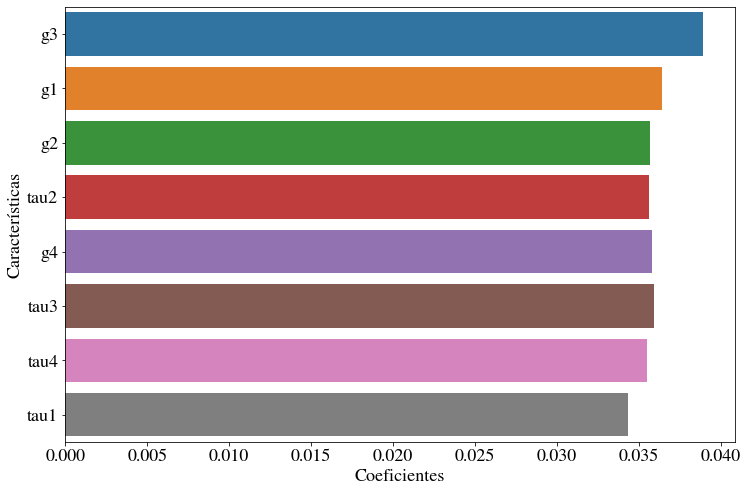

In [ ]:
imp = Mejor_Modelo_LR.coef_
imp = np.squeeze(np.asarray(imp))

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig = plt.figure(figsize=(12,8))

sns.barplot(y = Mejores_Caracteristicas, x = imp.T)
plt.xlabel("Coeficientes")
plt.ylabel("Características")
plt.show()

Ahora veamos como es su eficiencia para predecir con los datos de prueba

In [ ]:
# Mejores características = ['g3', 'g1', 'g2', 'tau2', 'g4', 'tau3', 'tau4', 'tau1']
X_Norm_Test = pd.DataFrame(X_Norm_Test, columns = X.columns)
X_Norm_Test_Seleccionados = X_Norm_Test[['g3', 'g1', 'g2', 'tau2', 'g4', 'tau3', 'tau4', 'tau1']]

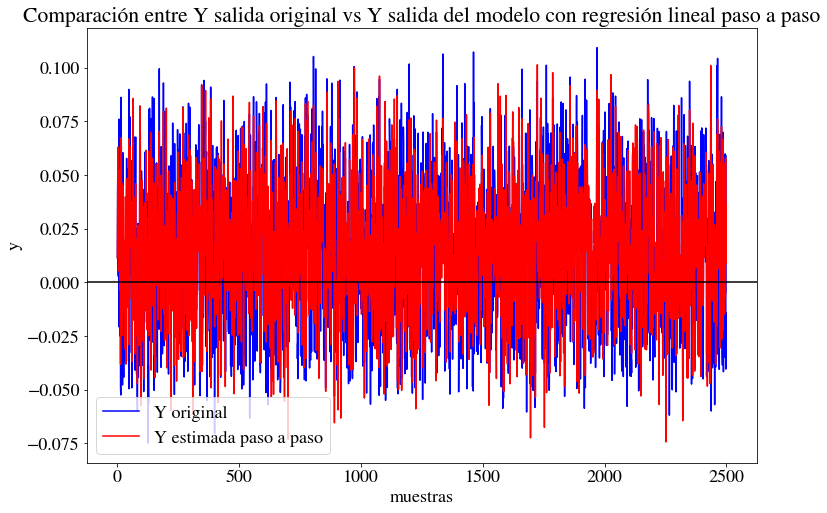

In [ ]:
Y_predi = Mejor_Modelo_LR.predict(X_Norm_Test_Seleccionados) # Estima los valores de salida del modelo de regresión

fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_predi, color = 'r', label='Y estimada paso a paso') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal paso a paso') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [ ]:
Puntaje_1 = Mejor_Modelo_LR.score(X_Norm_Test_Seleccionados, Y_Test) # Validación por puntaje o score
Validacion = cross_val_score(Mejor_Modelo_LR, X_Norm_Test_Seleccionados, Y_Test, cv = 5, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.6381
Media = -0.0005
Desviación Estándar = 0.000030512718524


In [ ]:
Validacion_R2 = cross_val_score(Mejor_Modelo_LR, X_Norm_Test_Seleccionados, Y_Test, cv = 5, scoring = 'r2')
Puntaje_3 = np.array([Validacion_R2.mean(), Validacion_R2.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada con coeficiente de determinación
print("Media o R2 promedio = {:.4f}".format(Puntaje_3[0]))
print("Desviación Estándar de R2 = {:.4f}".format(Puntaje_3[1]))

Media o R2 promedio = 0.6384
Desviación Estándar de R2 = 0.0186


In [ ]:
MN = MinMaxScaler(feature_range=(0, 1))
Y_Test_R = Y_Test.values
Y_Test_R = np.asarray(Y_Test_R)

Y_merge = np.vstack([Y_Test_R,Y_predi]).T # unificamos Y_prueba así como y_pred y luego aplicamos una transpuesta a la matriz

Y_merge = MN.fit_transform(Y_merge)

for _,n in enumerate(np.arange(0, Y_merge.shape[0])):
  if Y_merge[n,0] == 0:
    Y_merge[n,0] = 0.0001
  elif Y_merge[n,1] == 0:
    Y_merge[n,1] = 0.0001

In [ ]:
Puntaje_6 = mean_poisson_deviance(Y_merge[:,0], Y_merge[:,1]) # Se calcula la Pérdida media de regresión de la desviación de Poisson
print("MAE_Poisson = {:.4f}".format(Puntaje_6))

MAE_Poisson = 0.0353


### Regresión Lineal Ponderada

La regresión lineal ponderada se utiliza cuando se desea relacionar cada muestra o fila de los datos con un peso. Se puede combinar la regresión ponderada con la regresión por pasos para mejorar la construcción del mejor modelo.

In [ ]:
Pesos = X_Norm.mean(axis = 1)
Indices_Entrenamiento = X_Norm_Train.index
Indices_Prueba = X_Norm_Test.index
Pesos_Entrenamiento = Pesos[Indices_Entrenamiento]
Pesos_Prueba = Pesos[Indices_Prueba]

In [ ]:
def Modelo_para_Entrenar(features):
  if len(features) == 0:
    return None
  LR_Modelo_Ponderado = LinearRegression()
  LR_Modelo_Ponderado.fit(x[features],y, sample_weight = Pesos_Entrenamiento)
  return LR_Modelo_Ponderado

In [ ]:
def Puntaje_LR(LR_Modelo_Ponderado, features):
  if len(features) == 0:
    return dm.AIC_score(y, [y.mean()]*len(y), LR_Modelo_Ponderado, df = 1)
  return dm.AIC_score(y, LR_Modelo_Ponderado.predict(x[features]), LR_Modelo_Ponderado)

In [ ]:
Mejor_Modelo_LR_Ponderado, Mejores_Caracteristicas = dm.stepwise_selection(X_Norm_Train.columns, 
                                                                 Modelo_para_Entrenar, 
                                                                 Puntaje_LR, verbose = True)

Variables: tau1, tau2, tau3, tau4, p1, p2, p3, p4, g1, g2, g3, g4
Start: score=-28156.63, constant
Step: score=-28935.70, add g3
Step: score=-29669.70, add g1
Step: score=-30468.96, add g2
Step: score=-31332.30, add tau2
Step: score=-32275.12, add g4
Step: score=-33386.05, add tau3
Step: score=-34609.00, add tau4
Step: score=-36002.92, add tau1
Step: score=-36002.92, unchanged None


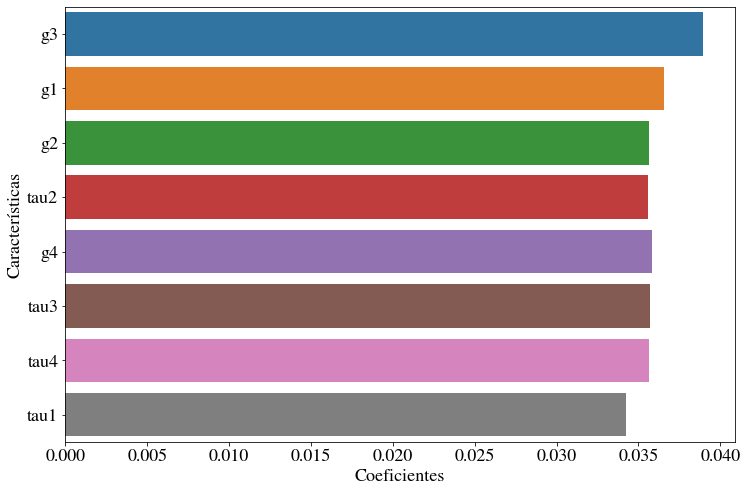

In [ ]:
imp = Mejor_Modelo_LR_Ponderado.coef_
imp = np.squeeze(np.asarray(imp))

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig = plt.figure(figsize=(12,8))

sns.barplot(y = Mejores_Caracteristicas, x = imp.T)
plt.xlabel("Coeficientes")
plt.ylabel("Características")
plt.show()

In [ ]:
X_Norm_Test_Seleccionados = X_Norm_Test[Mejores_Caracteristicas]

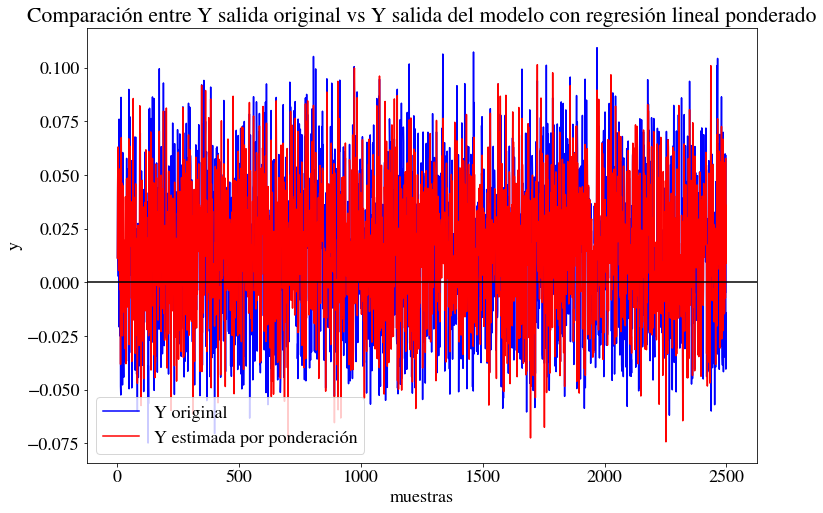

In [ ]:
Y_predi_peso = Mejor_Modelo_LR_Ponderado.predict(X_Norm_Test_Seleccionados) # Estima los valores de salida del modelo de regresión

fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_predi_peso, color = 'r', label='Y estimada por ponderación') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal ponderado') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [ ]:
MN = MinMaxScaler(feature_range=(0, 1))
Y_Test_R = Y_Test.values
Y_Test_R = np.asarray(Y_Test_R)

Y_merge = np.vstack([Y_Test_R,Y_predi_peso]).T # unificamos Y_prueba así como y_pred y luego aplicamos una transpuesta a la matriz

Y_merge = MN.fit_transform(Y_merge)

for _,n in enumerate(np.arange(0, Y_merge.shape[0])):
  if Y_merge[n,0] == 0:
    Y_merge[n,0] = 0.0001
  elif Y_merge[n,1] == 0:
    Y_merge[n,1] = 0.0001

In [ ]:
Puntaje_6 = mean_poisson_deviance(Y_merge[:,0], Y_merge[:,1]) # Se calcula la Pérdida media de regresión de la desviación de Poisson
print("MAE_Poisson = {:.4f}".format(Puntaje_6)) # Si la pérdida es 0, significa que el modelo es eficiente

MAE_Poisson = 0.0354


### Modelo de Regresión con Características Polinómicas

La regresión polinómica es una técnica que esta basado en usar modelos lineales cuando el conjunto de datos tiene una alta no-linealidad. La idea de esta regresión es adicionar alguna variable extra que es computado desde las variables existentes y usando, para este caso, una serie de combinaciones polinómicas de la forma:

$$\hat{y} = a_{0} + \sum_{i = 1}^m a_{n}*x_{n} + \sum_{j = m + 1}^k a_{j}*f_{p_j} (x_1, \ldots, x_m)$$

donde $f_{p_j}$ es una función polinomial, $m$ es el número de muestras y $k$ es el número de coeficientes polinómicos de $n$ grado.

In [ ]:
Modelo_Polinomico = PolynomialFeatures(degree = 3, interaction_only=True) # Se aplica la regresión polinómica con grado = 3
# interaction_only es una condición donde si es True solamente se producen las interaciones entre características que son la
# mayoría de grados distintos a las caracteristicas de los datos                                                                       

X_poly_entrenamiento = Modelo_Polinomico.fit_transform(X_Norm_Train) # Transformamos los datos de las características de los datos en datos con características polinomiales
X_poly_prueba = Modelo_Polinomico.fit_transform(X_Norm_Test) # Transformamos los datos de las características de los datos en datos con características polinomiales

In [ ]:
LR = LinearRegression()
LR.fit(X_poly_entrenamiento, Y_Train)

LinearRegression()

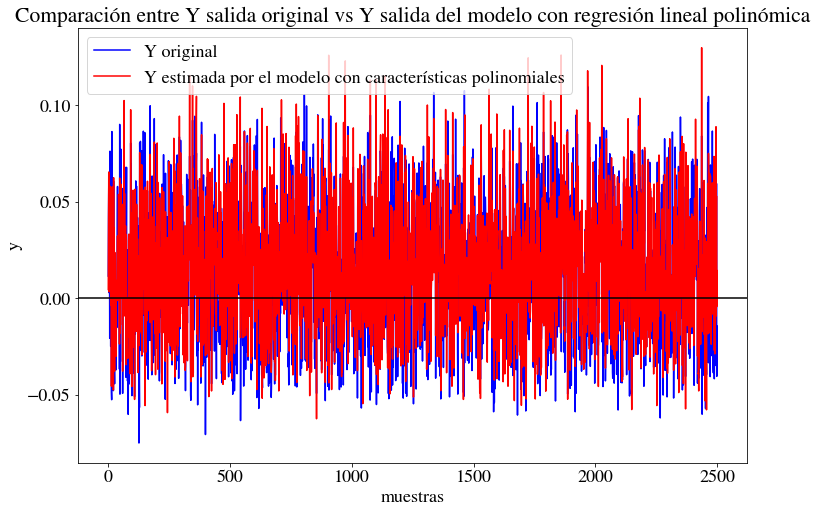

In [ ]:
Y_pred = LR.predict(X_poly_prueba)

fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_pred, color = 'r', label='Y estimada por el modelo con características polinomiales') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal polinómica') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [ ]:
Puntaje_1 = LR.score(X_poly_prueba, Y_Test) # Validación por puntaje o score
Validacion = cross_val_score(LR, X_poly_prueba, Y_Test, cv = 5, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.7420
Media = -0.0004
Desviación Estándar = 0.000017290857933


### Modelo de Regresión Lineal Robusta

La regresión robusta es un método que permite trabajar un regresor o modelo de regresión por medio de iteraciones subsiguientes después de dividir el conjunto de datos sin y con influencia de outliers. Lo anterior permite trabajar dos tipos de problema que evita el aumento del error de regresión. Dentro de la teoría de la regresión robusta, nosotros vamos a utilizar **RANSAC o random sample consensus**

In [ ]:
LR = LinearRegression()
LR.fit(X_Norm_Train, Y_Train)
MR = RANSACRegressor(base_estimator = LR, max_trials = 1000, residual_threshold = 0.2, stop_probability=0.99)
 # A partir del modelo de regresión lineal múltiple, se aumenta la robustez con el método RANSAC
MR.fit(X_Norm_Train, Y_Train)

RANSACRegressor(base_estimator=LinearRegression(), max_trials=1000,
                residual_threshold=0.2)

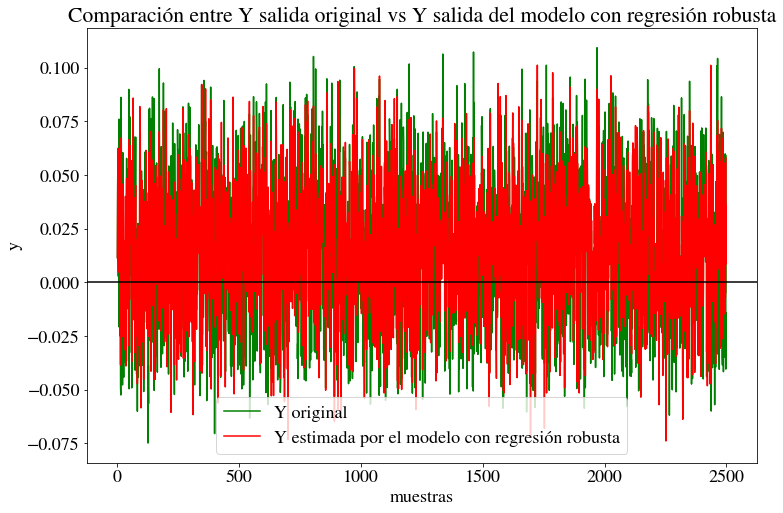

In [ ]:
Y_pred = MR.predict(X_Norm_Test)

fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, color = 'g', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_pred, color = 'r', label='Y estimada por el modelo con regresión robusta') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión robusta') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [ ]:
Puntaje_1 = MR.score(X_Norm_Test, Y_Test) # Validación por puntaje o score
Validacion = cross_val_score(MR, X_Norm_Test, Y_Test, cv = 5, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.6385
Media = -0.0005
Desviación Estándar = 0.000032693431785


In [ ]:
LR_Robusto_Poly = LinearRegression()
LR_Robusto_Poly.fit(X_poly_entrenamiento, Y_Train)
MR_poly = RANSACRegressor(base_estimator = LR, max_trials = 1000, residual_threshold = 0.5, stop_probability=0.99)
 # A partir del modelo de regresión lineal múltiple, se aumenta la robustez con el método RANSAC
MR_poly.fit(X_poly_entrenamiento, Y_Train)

RANSACRegressor(base_estimator=LinearRegression(), max_trials=1000,
                residual_threshold=0.5)

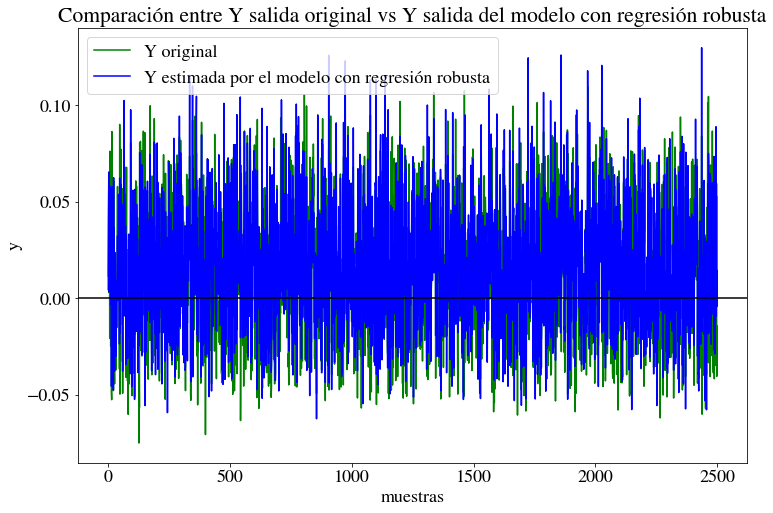

In [ ]:
Y_pred = MR_poly.predict(X_poly_prueba)

fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, color = 'g', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_pred, color = 'b', label='Y estimada por el modelo con regresión robusta') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión robusta') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [ ]:
Puntaje_1 = MR_poly.score(X_poly_prueba, Y_Test) # Validación por puntaje o score
Validacion = cross_val_score(MR_poly, X_poly_prueba, Y_Test, cv = 5, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.7420
Media = -0.0004
Desviación Estándar = 0.000017290857933


### Modelo Regresión Lineal con Transformaciones Logaritmicas y Raíz Cuadrada

In [ ]:
MA = MinMaxScaler()
MB = MinMaxScaler()
Y_Train_Norm = pd.DataFrame(MA.fit_transform(Y_Train.values.reshape(-1, 1)))
Y_Test_Norm = pd.DataFrame(MB.fit_transform(Y_Test.values.reshape(-1, 1)))

In [ ]:
X_Norm_Train = X_Norm_Train.replace(0,1e-10)
X_Norm_Test = X_Norm_Test.replace(0,1e-10)
Y_Norm_Train = Y_Train_Norm.replace(0,1e-10)
Y_Norm_Test = Y_Test_Norm.replace(0,1e-10)

In [ ]:
X_Norm_Train_Log = np.log(X_Norm_Train.values)
X_Norm_Test_Log = np.log(X_Norm_Test.values)
Y_Train_sqrt = np.sqrt(Y_Norm_Train.values)
Y_Test_sqrt = np.sqrt(Y_Norm_Test.values)

In [ ]:
LR = LinearRegression()
LR.fit(X_Norm_Train_Log, Y_Train_sqrt)

LinearRegression()

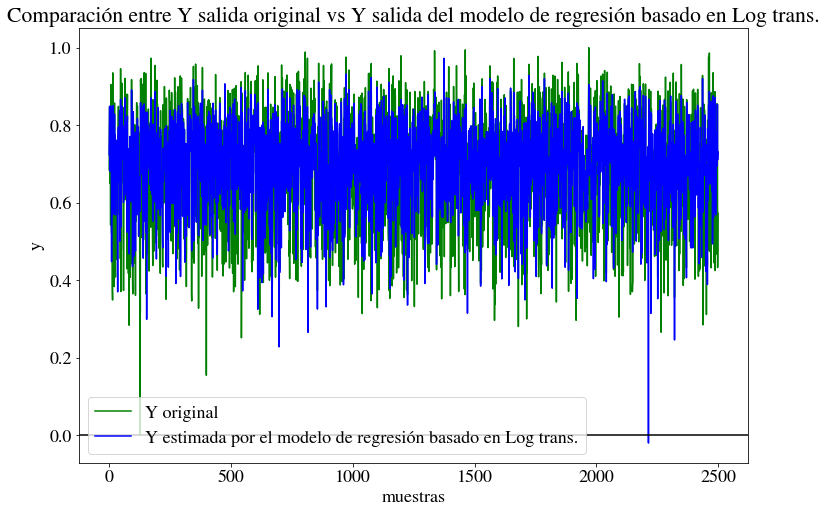

In [ ]:
Y_pred = LR.predict(X_Norm_Test_Log)

fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test_sqrt)), Y_Test_sqrt, color = 'g', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test_sqrt)), Y_pred, color = 'b', label='Y estimada por el modelo de regresión basado en Log trans.') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo de regresión basado en Log trans.') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [ ]:
Puntaje_1 = LR.score(X_Norm_Test_Log, Y_Test_sqrt) # Validación por puntaje o score
Validacion = cross_val_score(LR, X_Norm_Test_Log, Y_Test_sqrt, cv = 5, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.5829
Media = -0.0092
Desviación Estándar = 0.000947066720696
